## Applying MacSGP to detect cell-type-specific SGPs

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import os

import warnings
warnings.filterwarnings("ignore")

os.environ["CUDA_VISIBLE_DEVICES"] = "5"

import sys
sys.path.append(r'/import/home2/share/yqzeng/MacSGP/codes')
import MacSGP

In [2]:
DATA_PATH = "/import/home2/share/yqzeng/MacSGP/data/kidney_cancer" # Raw data
SAVE_PATH = "/import/home2/share/yqzeng/MacSGP/results/kidney_cancer" # Deconvolution results
os.makedirs(os.path.join(SAVE_PATH), exist_ok = True)

In [3]:
adata_st = ad.read_h5ad(os.path.join(DATA_PATH, "visium_1.h5ad"))
adata_basis = ad.read_h5ad(os.path.join(DATA_PATH, "visium_1_basis.h5ad"))

In [4]:
model = MacSGP.model.Model(adata_st, adata_basis, n_layers=4, training_steps=3000, coef_reg=200/18, estimate_gamma=False, estimate_alpha=False)

model.train(step_interval=200)
adata_result = model.eval()

  0%|          | 8/3000 [00:00<02:11, 22.75it/s]

Step: 0, Loss: -5897.9961, d_loss: -5903.8169, f_loss: 58.2077, reg_loss: 0.0000


  7%|▋         | 211/3000 [00:03<00:40, 68.17it/s]

Step: 200, Loss: -5977.6353, d_loss: -5988.4775, f_loss: 29.5791, reg_loss: 0.7096


 14%|█▍        | 414/3000 [00:06<00:37, 68.14it/s]

Step: 400, Loss: -6020.3789, d_loss: -6038.1035, f_loss: 29.1057, reg_loss: 1.3333


 20%|██        | 610/3000 [00:09<00:35, 68.08it/s]

Step: 600, Loss: -6038.0811, d_loss: -6056.0054, f_loss: 28.9098, reg_loss: 1.3530


 27%|██▋       | 813/3000 [00:12<00:32, 67.95it/s]

Step: 800, Loss: -6048.1924, d_loss: -6066.5259, f_loss: 28.7887, reg_loss: 1.3909


 34%|███▎      | 1009/3000 [00:15<00:29, 68.01it/s]

Step: 1000, Loss: -6054.4517, d_loss: -6072.6660, f_loss: 28.7039, reg_loss: 1.3809


 40%|████      | 1212/3000 [00:18<00:26, 68.04it/s]

Step: 1200, Loss: -6059.0107, d_loss: -6077.1948, f_loss: 28.6133, reg_loss: 1.3790


 47%|████▋     | 1408/3000 [00:20<00:23, 68.20it/s]

Step: 1400, Loss: -6061.9639, d_loss: -6079.9370, f_loss: 28.5286, reg_loss: 1.3608


 54%|█████▎    | 1611/3000 [00:23<00:20, 68.08it/s]

Step: 1600, Loss: -6063.9048, d_loss: -6081.6440, f_loss: 28.4574, reg_loss: 1.3404


 60%|██████    | 1814/3000 [00:26<00:17, 67.91it/s]

Step: 1800, Loss: -6065.4097, d_loss: -6083.1558, f_loss: 28.3790, reg_loss: 1.3417


 67%|██████▋   | 2010/3000 [00:29<00:14, 68.13it/s]

Step: 2000, Loss: -6066.7979, d_loss: -6084.3867, f_loss: 28.2955, reg_loss: 1.3283


 74%|███████▍  | 2213/3000 [00:32<00:11, 68.12it/s]

Step: 2200, Loss: -6067.7114, d_loss: -6085.1191, f_loss: 28.2281, reg_loss: 1.3126


 80%|████████  | 2409/3000 [00:35<00:08, 67.92it/s]

Step: 2400, Loss: -6068.3638, d_loss: -6085.7666, f_loss: 28.1534, reg_loss: 1.3128


 87%|████████▋ | 2612/3000 [00:38<00:05, 68.10it/s]

Step: 2600, Loss: -6068.9873, d_loss: -6086.2793, f_loss: 28.0662, reg_loss: 1.3037


 94%|█████████▎| 2808/3000 [00:41<00:02, 68.14it/s]

Step: 2800, Loss: -6069.5508, d_loss: -6086.8389, f_loss: 27.9795, reg_loss: 1.3041


100%|██████████| 3000/3000 [00:44<00:00, 67.81it/s]


Dropping cell types: []


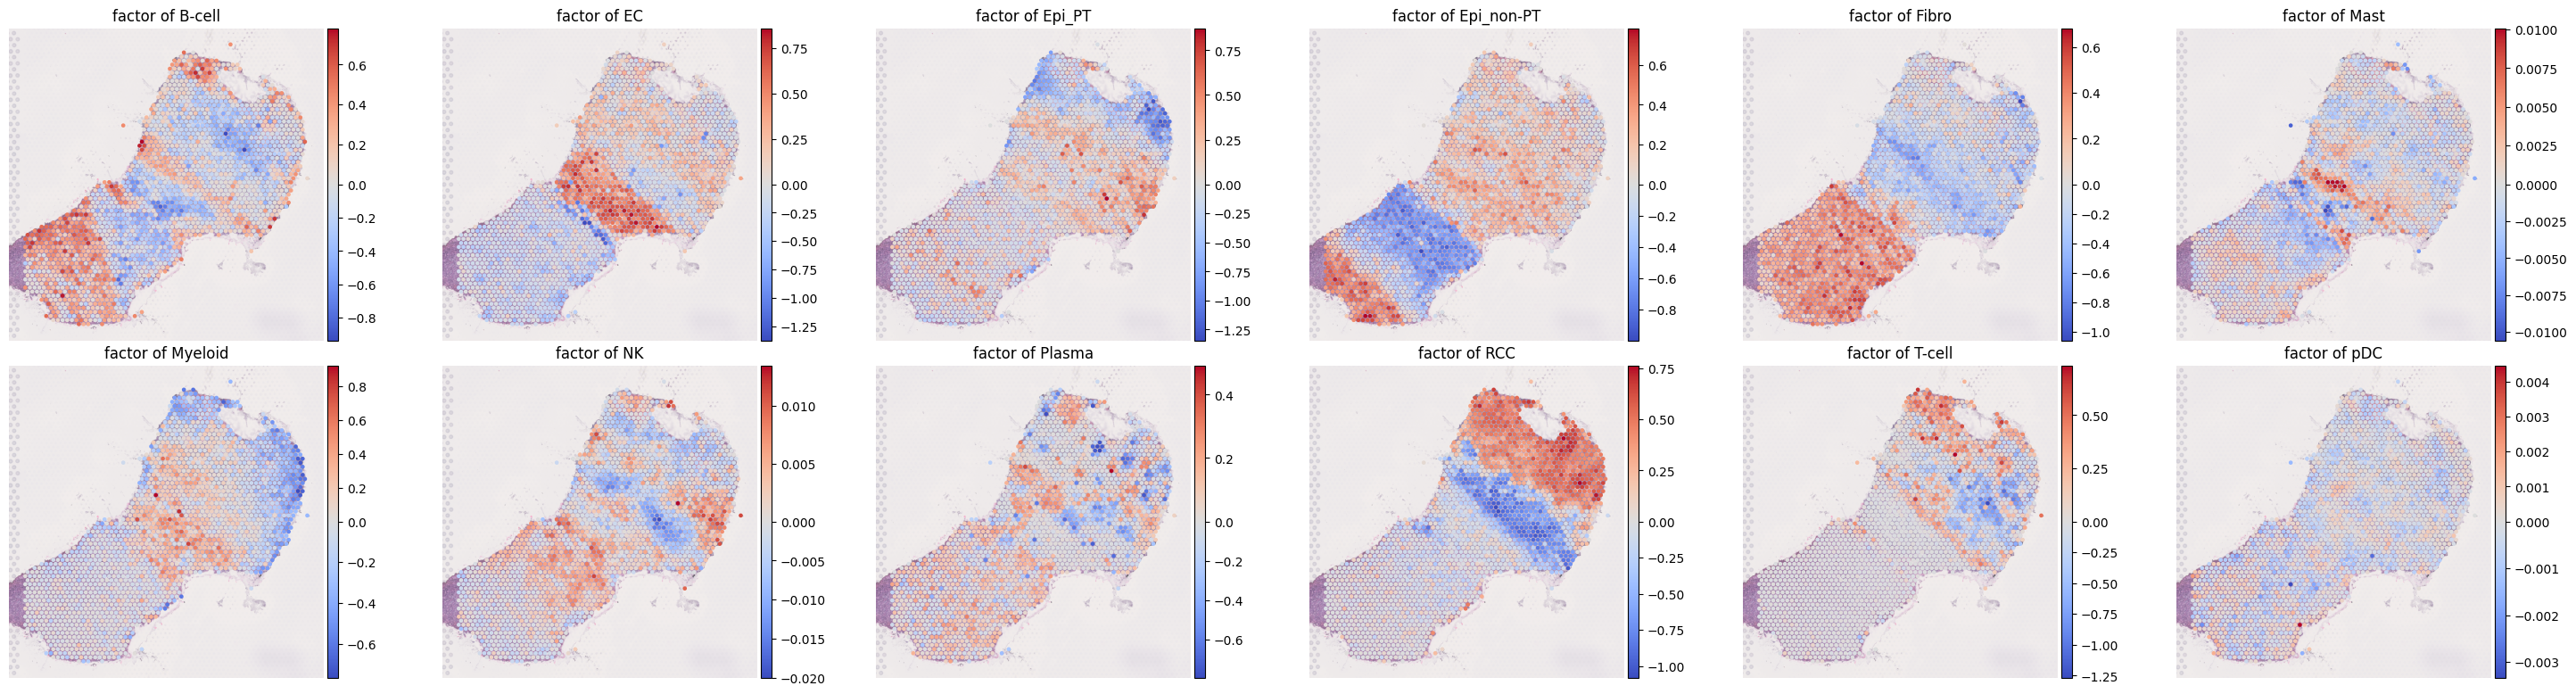

In [6]:
from MacSGP.vis import plot_spatial_ct

plot_spatial_ct(adata_result, index='factor', 
                proportion_threshold=0.0, num_threshold=100, 
                cmap='coolwarm', 
                spot_size=100, 
                ncols=6)